# KNN with CV
### Plotting accuracies after cross validation for k 1 to 30 and then for test data

In [1]:
from knn import KNN_with_cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [2]:
knn_cv = KNN_with_cv()
knn_cv.data_loader()
results = knn_cv.fit()
print("Optimized value of K: ",results['k_optimized'])

Optimized value of K:  19


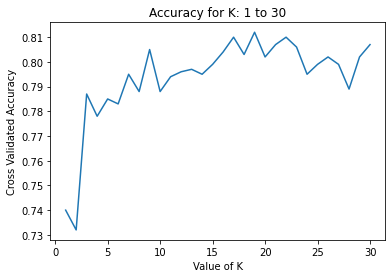

In [3]:
plt.plot(np.arange(1,31), results['accuracy_list'])
plt.title('Accuracy for K: 1 to 30')
plt.xlabel('Value of K')
plt.ylabel('Cross Validated Accuracy')
plt.show()

K Optimized:  22


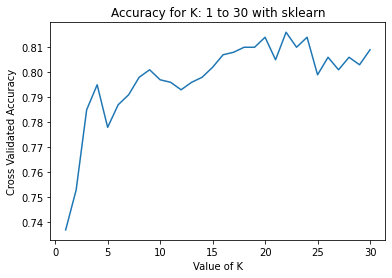

In [4]:
train_X = np.concatenate(knn_cv.train_data_folds, axis = 0)
train_y = np.concatenate(knn_cv.train_labels_folds, axis = 0)
test_X = knn_cv.test_data 
test_y = knn_cv.test_labels

sk_accuracy_cv = []
for k in list(np.arange(1,31)):
    neigh = KNeighborsClassifier(n_neighbors = k)
    cv_results = cross_validate(neigh, train_X, train_y, cv =10)
    sk_accuracy_cv.append(np.mean(cv_results['test_score']))
sk_k_optimized = sk_accuracy_cv.index(max(sk_accuracy_cv)) + 1
print('K Optimized: ',sk_k_optimized)

plt.plot(np.arange(1,31), sk_accuracy_cv)
plt.title('Accuracy for K: 1 to 30 with sklearn')
plt.xlabel('Value of K')
plt.ylabel('Cross Validated Accuracy')
plt.show()

### Accuracy on test set

In [5]:
test_accuracy = []
for k in list(np.arange(1,31)):
    test_accuracy.append(knn_cv.evaluate(k))
test_k_optimized = test_accuracy.index(max(test_accuracy)) + 1

In [6]:
test_k_optimized

10

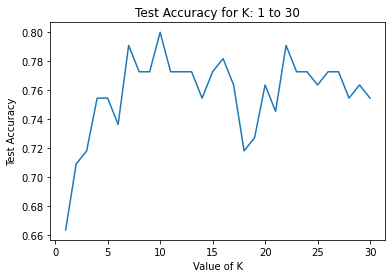

In [7]:
plt.plot(np.arange(1,31), test_accuracy)
plt.title('Test Accuracy for K: 1 to 30')
plt.xlabel('Value of K')
plt.ylabel('Test Accuracy')
plt.show()

In [8]:
print("Best test accuracy: ",test_accuracy[test_k_optimized-1])

Best test accuracy:  0.8


In [9]:
print("Test accuracy for optimized k from cv",test_accuracy[results['k_optimized'] - 1])

Test accuracy for optimized k from cv 0.7272727272727273
